# Baseline models

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
# Import necessary libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from scipy.stats import norm 
import statistics 

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('/Users/zhassulan/Desktop/Capstone Project/energy_consumption_clean.csv')


In [34]:
df.head()

,session_ID,User_type,Shared_ID,Start_plugin,Start_plugin_hour,End_plugout,End_plugout_hour,El_kWh,Duration_hours,month_plugin,...,User_ID_Share-9,User_ID_UT1-1,User_ID_UT1-2,User_ID_UT15-1,User_ID_UT15-2,User_ID_UT2-1,User_ID_UT7-1,User_ID_UT7-2,User_ID_UT7-3,User_ID_UT7-5
0,24,1,5418,2019-01-09 16:00:00,16,2019-01-10 10:20:00,10,187.0,1.757194e+09,1,...,0,0,0,0,0,0,0,0,0,0
1,25,1,5418,2019-01-09 20:00:00,20,2019-01-10 15:19:00,15,1038.0,1.833778e+09,1,...,0,0,0,0,0,0,0,0,0,0
2,28,0,343,2019-01-10 16:00:00,16,2019-01-10 17:20:00,17,51.0,8.319444e+08,1,...,0,0,0,0,0,0,0,0,0,0
3,29,1,5418,2019-01-10 23:00:00,23,2019-01-11 18:10:00,18,835.0,1.863139e+09,1,...,0,0,0,0,0,0,0,0,0,0
4,30,0,343,2019-01-11 15:00:00,15,2019-01-11 17:07:00,17,117.0,1.917778e+09,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.shape

(6808, 172)

In [36]:
# Changing datetime format
df['Start_plugin'] = pd.to_datetime(df['Start_plugin'], format='%Y-%m-%d %H:%M:%S')
df['Start_plugin_date'] = pd.to_datetime(df['Start_plugin_date'], format='%Y-%m-%d')
df['End_plugout'] = pd.to_datetime(df['End_plugout'], format='%Y-%m-%d %H:%M:%S')


In [37]:
df['Start_plugin_date'] = df['Start_plugin_date'].dt.year  # Extract year

# Drop the original 'Start_plugin_date' column if needed
df = df.drop(columns=['End_plugout', 'Start_plugin'])

In [38]:
# Sanity check
df.select_dtypes(include=['datetime']).head()


""
0
1
2
3
4


## Mean Baseline model

In [39]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

target_variable = 'El_kWh'

# Calculate the mean of the target variable
mean_energy_consumption = df[target_variable].mean()

# Create predictions using the mean value for all observations
baseline_predictions = [mean_energy_consumption] * len(df)

# Evaluate the Mean Baseline model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(df[target_variable], baseline_predictions))

print(f'Mean Baseline RMSE: {rmse}')


Mean Baseline RMSE: 1161.1440300531206


Text(0.5, 1.0, 'Mean Baseline Model Predictions vs Actual Values')

Text(0.5, 0, 'Actual Energy Consumption (El_kWh)')

Text(0, 0.5, 'Mean Baseline Predictions')

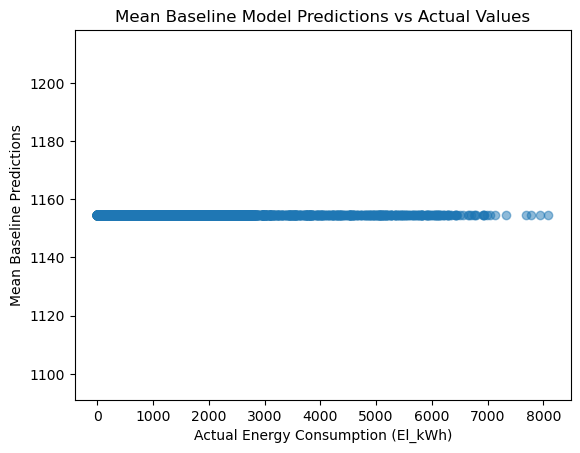

In [40]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df[target_variable], baseline_predictions, alpha=0.5)
plt.title('Mean Baseline Model Predictions vs Actual Values')
plt.xlabel('Actual Energy Consumption (El_kWh)')
plt.ylabel('Mean Baseline Predictions')
plt.show()


The Root Mean Squared Error (RMSE) is a measure of how well your model is performing in terms of prediction accuracy. In the context of predicting energy consumption:

***Interpretation of RMSE:*** The value of 1160.80 represents the average magnitude of the errors (residuals) made by the Mean Baseline model in predicting energy consumption. Lower RMSE values indicate better model performance.

***Comparison:*** When you build more advanced models (e.g., regression models, machine learning models), you'll aim to achieve an RMSE significantly lower than the Mean Baseline RMSE. The idea is that your sophisticated models should make more accurate predictions than a simple baseline.

***Baseline Reference:****
The Mean Baseline RMSE serves as a reference point. Any subsequent model you develop should demonstrate an improvement over this baseline. If your more advanced models have higher RMSE values than the Mean Baseline, they are not providing meaningful improvements.


## Linear Regression model

In [41]:
X = df.drop('El_kWh', axis=1)
y = df['El_kWh']


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X contains your features and y is the target variable (El_kWh)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse_linear_regression = mean_squared_error(y_test, predictions, squared=False)

print(f'Root Mean Squared Error (RMSE) for Linear Regression: {rmse_linear_regression}')



LinearRegression()

Root Mean Squared Error (RMSE) for Linear Regression: 805.0164821861182


***Comparison to Baseline:***
We can see that Linear regression model has a lower RMSE than the Mean Baseline model. 
That's mean that it performing better.

In [43]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = model.score(X_test, y_test)

print(f'R-squared (coefficient of determination) for Linear Regression: {r2}')


R-squared (coefficient of determination) for Linear Regression: 0.5029448518860495


***Visualization***

Text(0.5, 1.0, 'Linear Regression Model Predictions vs Actual Values')

Text(0.5, 0, 'Actual Energy Consumption (El_kWh)')

Text(0, 0.5, 'Linear Regression Predictions')

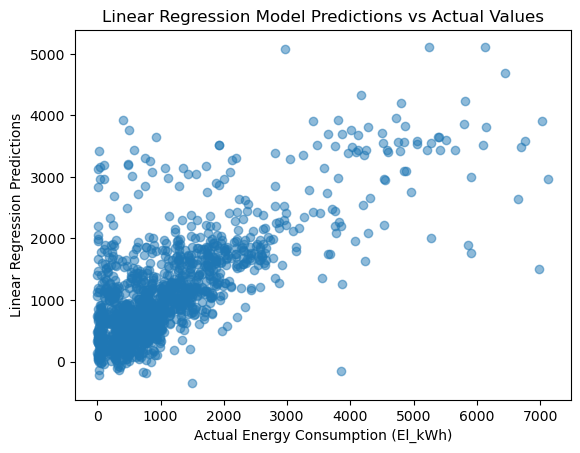

In [44]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Linear Regression Model Predictions vs Actual Values')
plt.xlabel('Actual Energy Consumption (El_kWh)')
plt.ylabel('Linear Regression Predictions')
plt.show()


Text(0.5, 1.0, 'Scatter Plot: Actual vs Predicted')

Text(0.5, 0, 'Actual El_kWh')

Text(0, 0.5, 'Predicted El_kWh')

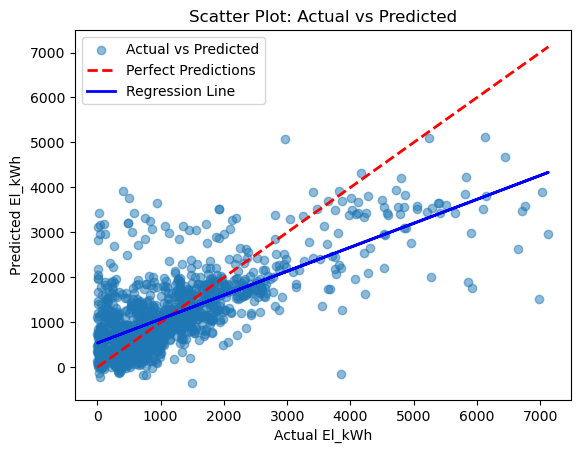

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs Predicted')
plt.title('Scatter Plot: Actual vs Predicted')
plt.xlabel('Actual El_kWh')
plt.ylabel('Predicted El_kWh')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

# Regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='blue', linewidth=2, label='Regression Line')

# Add legend
plt.legend()

plt.show()


As we can see it is a lot we need to improve to get aour best predictions.

***Scaling your Features***

In [46]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now, you can fit the model using the scaled data
model.fit(X_train_scaled, y_train)


LinearRegression()

***Fitting the linear regression model using the scaled data.***

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Fit the model using the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
predictions_scaled = model.predict(X_test_scaled)

# Calculate RMSE for the scaled predictions
rmse_linear_regression_scaled = mean_squared_error(y_test, predictions_scaled, squared=False)

print(f'Root Mean Squared Error (RMSE) for Scaled Linear Regression: {rmse_linear_regression_scaled}')


LinearRegression()

Root Mean Squared Error (RMSE) for Scaled Linear Regression: 808.5021705947908


Text(0.5, 1.0, 'Scatter Plot: Actual vs Predicted (Scaled Linear Regression)')

Text(0.5, 0, 'Actual El_kWh')

Text(0, 0.5, 'Predicted El_kWh')

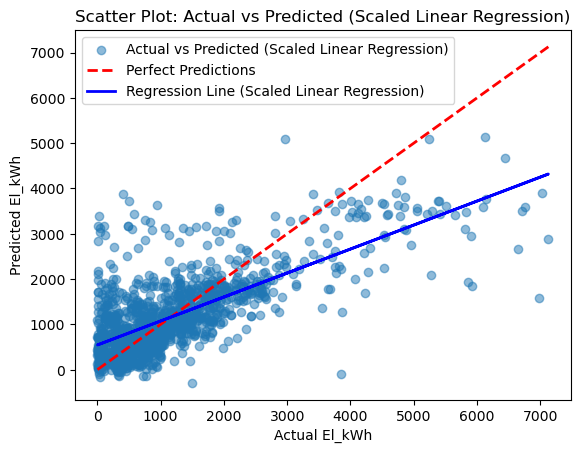

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot
plt.scatter(y_test, predictions_scaled, alpha=0.5, label='Actual vs Predicted (Scaled Linear Regression)')
plt.title('Scatter Plot: Actual vs Predicted (Scaled Linear Regression)')
plt.xlabel('Actual El_kWh')
plt.ylabel('Predicted El_kWh')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

# Regression line
z = np.polyfit(y_test, predictions_scaled, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='blue', linewidth=2, label='Regression Line (Scaled Linear Regression)')

# Add legend
plt.legend()

plt.show()


We can see almost no difference between scaled and not scaled. Even though, out scaled one has higher RMSE score, whats mean is that not scaled one is acting better.

## Decision Tree Regressor:

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (Decision Tree Regressor): {rmse}")


DecisionTreeRegressor(random_state=42)

Root Mean Squared Error (Decision Tree Regressor): 905.9073412145267


Text(0.5, 1.0, 'Scatter Plot: Actual vs Predicted (Decision Tree Regressor)')

Text(0.5, 0, 'Actual Energy Consumption (El_kWh)')

Text(0, 0.5, 'Decision Tree Regressor Predictions')

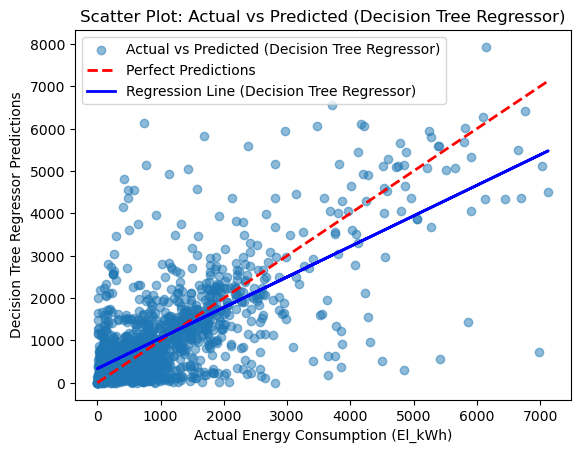

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs Predicted (Decision Tree Regressor)')
plt.title('Scatter Plot: Actual vs Predicted (Decision Tree Regressor)')
plt.xlabel('Actual Energy Consumption (El_kWh)')
plt.ylabel('Decision Tree Regressor Predictions')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

# Regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='blue', linewidth=2, label='Regression Line (Decision Tree Regressor)')

# Add legend
plt.legend()

plt.show()


WE can say that Decision Tree is performing better based on scatterplot but RMSE is 905, that is higher than other ones, so the accuracy of prediction is lower.

***Fitting the Decision Tree Regressor using the scaled data.***

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_scaled, y_train)

y_pred_scaled = dt_regressor.predict(X_test_scaled)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (Scaled Decision Tree Regressor): {rmse}")


DecisionTreeRegressor(random_state=42)

Root Mean Squared Error (Scaled Decision Tree Regressor): 905.9073412145267


Scaled Decision Tree is same as not scaled. 

## Comparing Models

In [87]:
target_variable = 'El_kWh'

# Calculate the range of the target variable
target_range = df[target_variable].max() - df[target_variable].min()

# Print the range
print(f'Target Variable Range: {target_range}')

# Evaluate Mean Baseline model
mean_energy_consumption = df[target_variable].mean()
baseline_predictions = [mean_energy_consumption] * len(df)
rmse_baseline = sqrt(mean_squared_error(df[target_variable], baseline_predictions))
print(f'Mean Baseline RMSE: {rmse_baseline}')

# Evaluate Linear Regression model
rmse_linear_regression = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE) for Linear Regression: {rmse_linear_regression}')

# Evaluate Scaled Linear Regression model
rmse_linear_regression_scaled = sqrt(mean_squared_error(y_test, predictions_scaled))
print(f'Root Mean Squared Error (RMSE) for Scaled Linear Regression: {rmse_linear_regression_scaled}')

# Evaluate Decision Tree Regressor model
y_pred_dt = dt_regressor.predict(X_test)
rmse_decision_tree = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (Decision Tree Regressor): {rmse_decision_tree}")

# Evaluate Scaled Decision Tree Regressor model
y_pred_dt_scaled = dt_regressor.predict(X_test_scaled)
rmse_decision_tree_scaled = sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f"Root Mean Squared Error (Scaled Decision Tree Regressor): {rmse_decision_tree_scaled}")

# Compare RMSE to the range
def compare_rmse_to_range(rmse, range_val):
    if rmse < range_val:
        return 'The RMSE is small compared to the range of the target variable.'
    else:
        return 'The RMSE is large compared to the range of the target variable. Model performance might be a concern.'

# Print comparisons
print(compare_rmse_to_range(rmse_baseline, target_range))
print(compare_rmse_to_range(rmse_linear_regression, target_range))
print(compare_rmse_to_range(rmse_linear_regression_scaled, target_range))
print(compare_rmse_to_range(rmse_decision_tree, target_range))
print(compare_rmse_to_range(rmse_decision_tree_scaled, target_range))


Target Variable Range: 8085.0
Mean Baseline RMSE: 1161.1440300531206
Root Mean Squared Error (RMSE) for Linear Regression: 805.0164821861182
Root Mean Squared Error (RMSE) for Scaled Linear Regression: 808.5021705947908
Root Mean Squared Error (Decision Tree Regressor): 905.9073412145267
Root Mean Squared Error (Scaled Decision Tree Regressor): 899.3409534286483
The RMSE is small compared to the range of the target variable.
The RMSE is small compared to the range of the target variable.
The RMSE is small compared to the range of the target variable.
The RMSE is small compared to the range of the target variable.
The RMSE is small compared to the range of the target variable.


***PLot Comparison***

<Figure size 2000x2000 with 0 Axes>

<Axes: >

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'RMSE Comparisons')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'RMSE')

([<matplotlib.axis.XTick at 0x28871a5d0>,
 [Text(0, 0, 'Mean Baseline'),
  Text(1, 0, 'Linear Regression'),
  Text(2, 0, 'Scaled Linear Regression'),
  Text(3, 0, 'Decision Tree'),
  Text(4, 0, 'Scaled Decision Tree')])

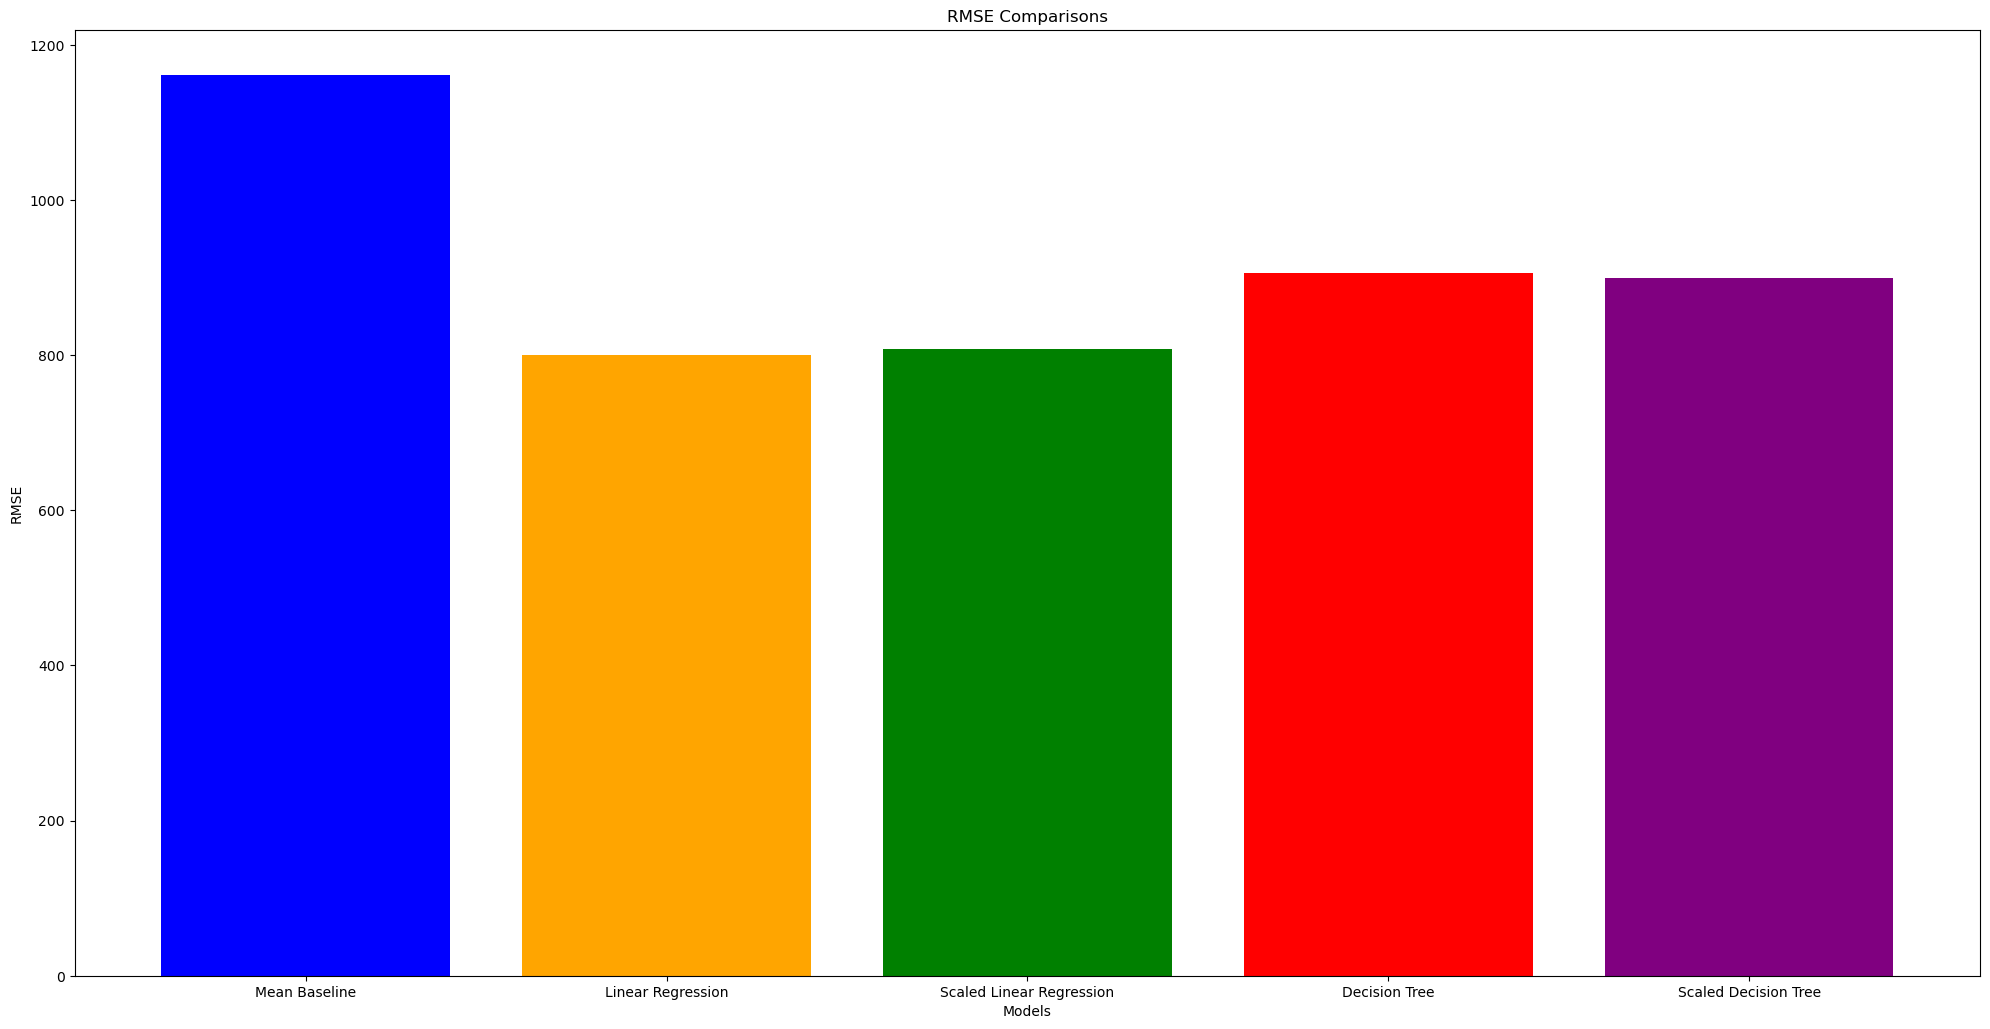

In [103]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,20))
# RMSE Comparisons Plot
plt.subplot(2, 1, 2)
rmse_values = [rmse_baseline, rmse_linear_regression, rmse_linear_regression_scaled, rmse_decision_tree, rmse_decision_tree_scaled]
labels = ['Mean Baseline', 'Linear Regression', 'Scaled Linear Regression', 'Decision Tree', 'Scaled Decision Tree']
colors = ['blue', 'orange', 'green', 'red', 'purple']
bar_width = 0.4
index = np.arange(len(labels))

plt.bar(index, rmse_values, color=colors)
plt.title('RMSE Comparisons')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(index, labels)
plt.tight_layout()

plt.show()


**Conclusion:**
- Linear regression is best model so far.
- If the RMSE is still not satisfactory, we can explore more advanced modeling techniques, feature engineering, hyperparameter tuning, or even consider using more complex models like ensemble methods, decision trees, or neural networks.


## Applying PCA

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training set using standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit PCA on the scaled training set
my_PCA = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test set using the same scaler and PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and fit the linear regression model on the PCA-transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)x

# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Calculate RMSE
rmse_linear_regression = mean_squared_error(y_test, predictions, squared=False)

print(f'Root Mean Squared Error (RMSE) for Linear Regression with PCA: {rmse_linear_regression}')


LinearRegression()

Root Mean Squared Error (RMSE) for Linear Regression with PCA: 19357567098511.2


RMSE it is to unreal, we will try different scaling method.

***MinMaxScaler***

In [91]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training set using MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit PCA on the scaled training set
my_PCA = PCA(n_components=2)
X_train_pca = my_PCA.fit_transform(X_train_scaled)

# Transform the test set using the same scaler and PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = my_PCA.transform(X_test_scaled)

# Initialize and fit the linear regression model on the PCA-transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Calculate RMSE
rmse_linear_regression = mean_squared_error(y_test, predictions, squared=False)

print(f'Root Mean Squared Error (RMSE) for Linear Regression with PCA using MinMaxScaler: {rmse_linear_regression}')


LinearRegression()

Root Mean Squared Error (RMSE) for Linear Regression with PCA using MinMaxScaler: 1142.8394252724809


We can see hight RMSE, thats mean we need to adjust our n_components

Cumulative Explained Variance

PCA()

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

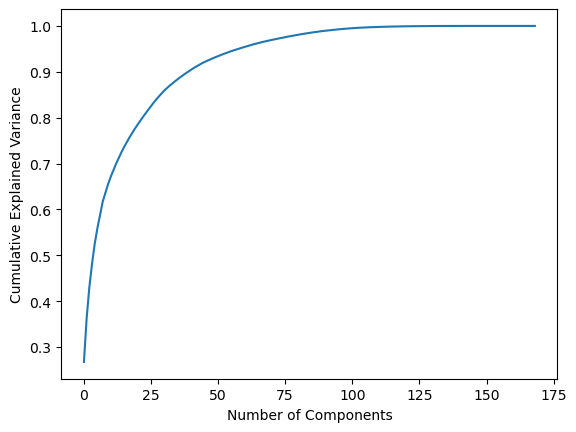

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


By using elbow method, we will go with around 110 components.

In [96]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X contains your features and y is the target variable (El_kWh)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training set using MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit PCA on the scaled training set
my_PCA = PCA(n_components=110)
X_train_pca = my_PCA.fit_transform(X_train_scaled)

# Transform the test set using the same scaler and PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = my_PCA.transform(X_test_scaled)

# Initialize and fit the linear regression model on the PCA-transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Calculate RMSE
rmse_linear_regression = mean_squared_error(y_test, predictions, squared=False)

print(f'Root Mean Squared Error (RMSE) for Linear Regression with PCA using MinMaxScaler: {rmse_linear_regression}')


LinearRegression()

Root Mean Squared Error (RMSE) for Linear Regression with PCA using MinMaxScaler: 801.2176300216518


Now RMSE looks better, and it is best performance so far.
But it is still space to work on!

We will try Cross Validation

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cross-Validation RMSE')

Text(0.5, 1.0, 'Cross-Validation Performance vs. Number of Components')

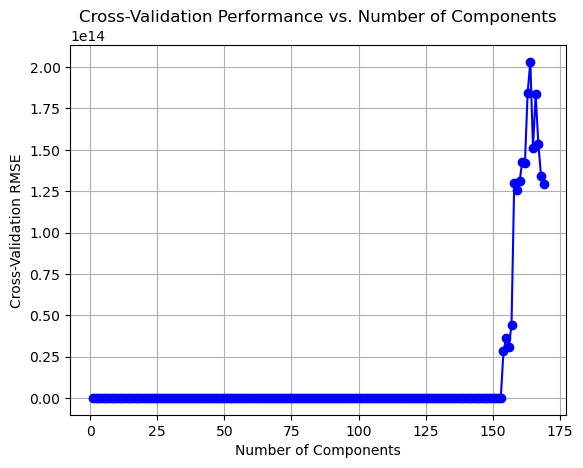

Best Number of Components: 134


In [99]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with PCA and Linear Regression
pipeline = make_pipeline(StandardScaler(), PCA(), LinearRegression())

# Specify the range of components to try
n_components_range = range(1, 170)

# Dictionary to store cross-validation scores for each number of components
cv_scores = {}

# Iterate over different numbers of components
for n_components in n_components_range:
    pipeline.named_steps['pca'].n_components = n_components  # Set the number of components
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Use cross-validation
    cv_scores[n_components] = np.sqrt(-scores.mean())  # Convert negative MSE to RMSE

# Find the number of components with the best performance
best_n_components = min(cv_scores, key=cv_scores.get)

# Plot the cross-validation scores
plt.plot(n_components_range, list(cv_scores.values()), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation RMSE')
plt.title('Cross-Validation Performance vs. Number of Components')
plt.grid(True)
plt.show()

print(f'Best Number of Components: {best_n_components}')


In [100]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X contains your features and y is the target variable (El_kWh)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training set using MinMax scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit PCA on the scaled training set
my_PCA = PCA(n_components=134)
X_train_pca = my_PCA.fit_transform(X_train_scaled)

# Transform the test set using the same scaler and PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = my_PCA.transform(X_test_scaled)

# Initialize and fit the linear regression model on the PCA-transformed data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_pca)

# Calculate RMSE
rmse_linear_regression = mean_squared_error(y_test, predictions, squared=False)

print(f'Root Mean Squared Error (RMSE) for Linear Regression with PCA using MinMaxScaler: {rmse_linear_regression}')


LinearRegression()

Root Mean Squared Error (RMSE) for Linear Regression with PCA using MinMaxScaler: 799.9656904603858


Plotting our results

Text(0.5, 1.0, 'Scatter Plot: Actual vs Predicted with PCA and MinMaxScaler')

Text(0.5, 0, 'Actual El_kWh')

Text(0, 0.5, 'Predicted El_kWh')

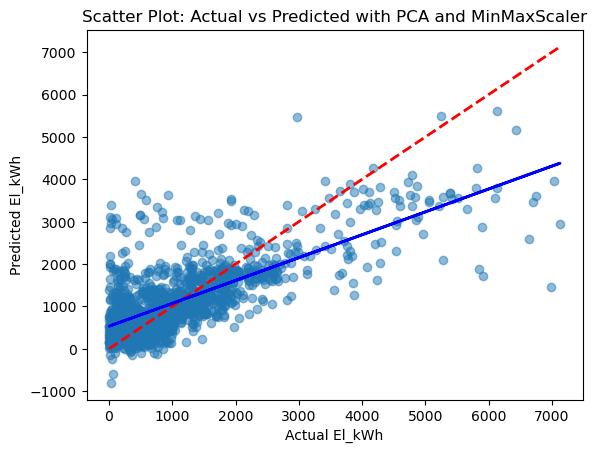

In [101]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Scatter Plot: Actual vs Predicted with PCA and MinMaxScaler')
plt.xlabel('Actual El_kWh')
plt.ylabel('Predicted El_kWh')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='blue', linewidth=2)

plt.show()


In [102]:
from sklearn.metrics import r2_score, mean_absolute_error

# R-squared
r2 = r2_score(y_test, predictions)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear_regression:.4f}')


R-squared: 0.5092
Mean Absolute Error (MAE): 530.1829
Root Mean Squared Error (RMSE): 799.9657


The R-squared value of 0.5092 indicates that you linear regression model explains about 50.92% of the variance in the target variable. This is a moderate level of explanatory power. The Mean Absolute Error (MAE) of 530.1829 represents the average absolute difference between the actual and predicted values, and the Root Mean Squared Error (RMSE) of 799.9657 gives us an idea of the typical size of the errors.